Introduction to the Loan Approval Dataset

The Loan Approval dataset is a widely used dataset in machine learning and data analytics, designed to study and predict whether a loan application should be approved or rejected based on various applicant details. It simulates the decision-making process of financial institutions that evaluate loan eligibility using multiple demographic, financial, and employment-related factors.

This dataset typically contains a mix of categorical and numerical variables, representing the personal and financial profile of loan applicants. By analyzing these attributes, one can train models to classify applications as approved or not approved, which can help automate and improve the loan assessment process.

Common attributes in this dataset include:

Gender: Applicant’s gender (Male/Female)

Married: Marital status of the applicant

Dependents: Number of dependents

Education: Applicant’s education level (Graduate/Not Graduate)

Self_Employed: Whether the applicant is self-employed or not

ApplicantIncome: Applicant’s monthly income

CoapplicantIncome: Co-applicant’s monthly income

LoanAmount: Amount of loan applied for

Loan_Amount_Term: Duration of the loan (in months)

Credit_History: Credit history record (1 = good, 0 = bad)

Property_Area: Type of property area (Urban, Semiurban, Rural)

Loan_Status: Target variable indicating loan approval (Y = Approved, N = Not Approved

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [61]:
df=pd.read_csv(r"C:\datascience\project\maachine  learning 2\loan_approval (1).csv")
print("first 5 row")
print(df.head())
print("last 5 row")
print(df.head())

first 5 row
              name              city  income  credit_score  loan_amount  \
0     Allison Hill         East Jill  113810           389        39698   
1     Brandon Hall     New Jamesside   44592           729        15446   
2     Rhonda Smith      Lake Roberto   33278           584        11189   
3  Gabrielle Davis  West Melanieview  127196           344        48823   
4     Valerie Gray         Mariastad   66048           496        47174   

   years_employed  points  loan_approved  
0              27    50.0          False  
1              28    55.0          False  
2              13    45.0          False  
3              29    50.0          False  
4               4    25.0          False  
last 5 row
              name              city  income  credit_score  loan_amount  \
0     Allison Hill         East Jill  113810           389        39698   
1     Brandon Hall     New Jamesside   44592           729        15446   
2     Rhonda Smith      Lake Roberto   3327

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   int32  
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 117.3+ KB


In [62]:
#data cleaning
df.isna().sum()

name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

In [63]:
df.dtypes

name               object
city               object
income              int64
credit_score        int64
loan_amount         int64
years_employed      int64
points            float64
loan_approved        bool
dtype: object

In [64]:
print(df['loan_approved'].unique())
df['loan_approved']=df['loan_approved'].astype(int)
df

[False  True]


,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,0
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,0
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,0
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,0
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,0
...,...,...,...,...,...,...,...,...
1995,James Schaefer,Robertton,92163,770,12251,13,85.0,1
1996,Diana Lin,New Frank,38799,635,48259,17,40.0,0
1997,Brandon Meyer,East Haley,41957,763,16752,5,60.0,1
1998,Jason Price,Adamland,139022,360,24031,35,55.0,0


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'income'),
  Text(1, 0, 'credit_score'),
  Text(2, 0, 'loan_amount'),
  Text(3, 0, 'years_employed'),
  Text(4, 0, 'points'),
  Text(5, 0, 'loan_approved')])

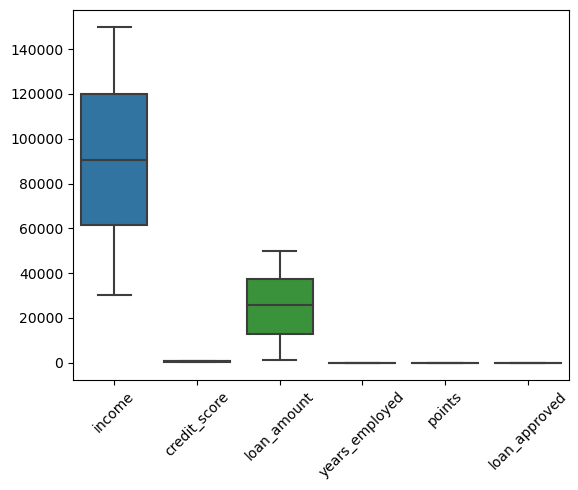

In [65]:
sns.boxplot(df)
plt.xticks(rotation=45)

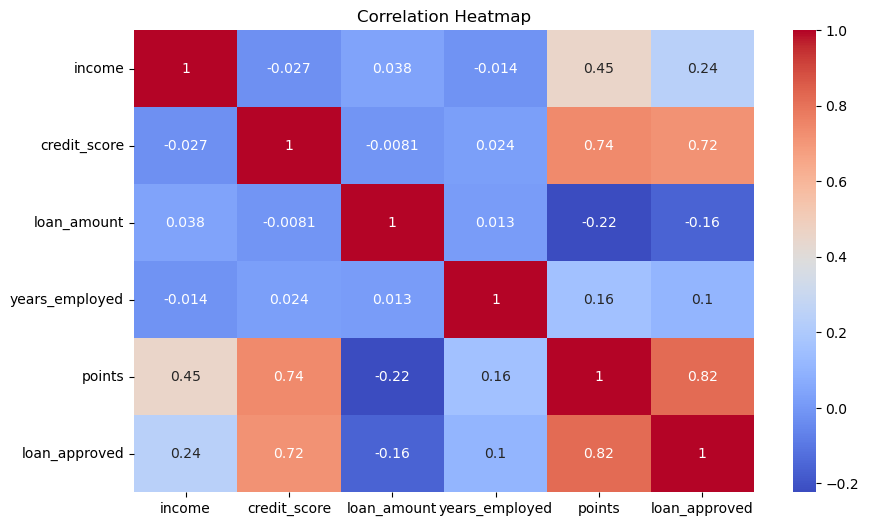

In [66]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [67]:
x=df[['credit_score','points']]
y=df['loan_approved']

In [68]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter= 1000)
# fitting model with data
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [70]:
#Evaluating the Algorithm
from sklearn import metrics
print(metrics.mean_absolute_error)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred) ))
print("Accuracy:", metrics. accuracy_score(y_test, y_pred))

<function mean_absolute_error at 0x000001D777E67910>
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Accuracy: 1.0


using  svm

In [71]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(X_train)
x_test= st_x. transform(X_test)


from sklearn.svm import SVC 
classifier = SVC(kernel='linear' ,random_state=0)
classifier.fit(X_train, y_train)


#Predicting the test set result
y_pred= classifier.predict(X_test)

# evaluate predictions
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.2f'% (accuracy*100))
test=[[500,50]]
test=st_x.transform(test)
y_pred_2=classifier.predict(test)
print(y_pred_2)

Accuracy: 100.00
[0]


c:\Users\ruksana\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ruksana\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
